In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
X_train[0].shape

(32, 32, 3)

In [8]:
X_train[0].ndim

3

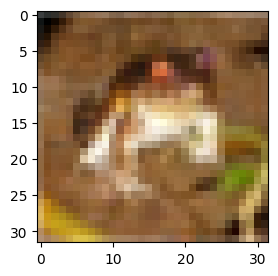

In [9]:
plt.figure(figsize=(7,3))
plt.imshow(X_train[0])

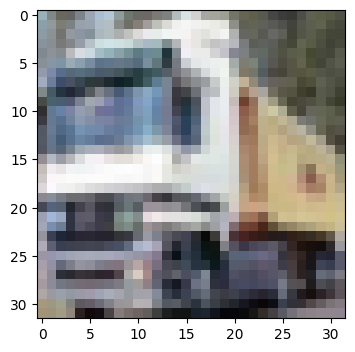

In [10]:
plt.figure(figsize=(7,4))
plt.imshow(X_train[1])

In [11]:
y_train=y_train.reshape(-1,)

In [65]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
def classes_name(x,y,index):
  plt.figure(figsize=(10,4))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

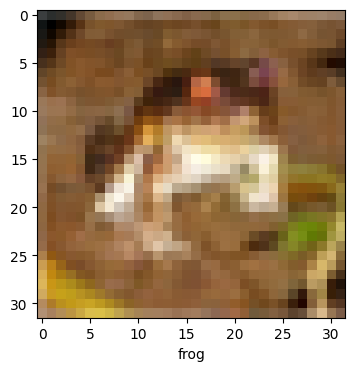

In [15]:
classes_name(X_train,y_train,0)

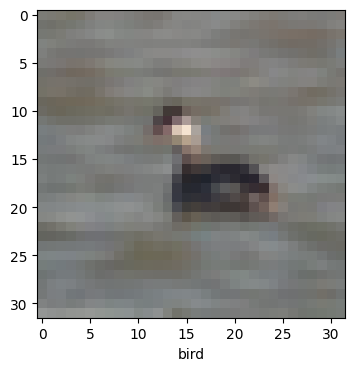

In [16]:
classes_name(X_train,y_train,1500)

In [17]:
#normalize the data
X_train=X_train/255
X_test=X_test/255

In [18]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [19]:
model =models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                          layers.Dense(units=1000,activation='relu'),
                          layers.Dense(units=3000,activation='relu'),
                          layers.Dense(units=10,activation='sigmoid')


                          ])

model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [20]:
model.fit(X_train,y_train,epochs=10)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dense_1 (Dense)             (None, 3000)              3003000   
                                                                 
 dense_2 (Dense)             (None, 10)                30010     
                                                                 
Total params: 6,106,010
Trainable params: 6,106,010
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.evaluate(X_test,y_test)

In [23]:
y_pred=model.predict(X_test)

In [24]:
y_pred_classes=[np.argmax(i) for i in y_pred]

In [25]:
y_pred_classes[:5]

In [26]:
y_test[:5]

In [27]:
print(classification_report(y_test,y_pred_classes))

In [31]:
#Convolution Neural Network

CNN=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(units=64,activation='relu'),
    layers.Dense(units=10,activation='softmax')
])

In [32]:
CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [33]:
CNN.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 4ms/step - loss: 1.4868 - accuracy: 0.4651
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1188 - accuracy: 0.6094
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9892 - accuracy: 0.6535
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9083 - accuracy: 0.6839
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8431 - accuracy: 0.7065
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7914 - accuracy: 0.7265
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7476 - accuracy: 0.7386
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7078 - accuracy: 0.7542
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6700 - accuracy: 0.7660
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.63

In [35]:
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [36]:
y_pred=CNN.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [44]:
y_pred_classes=[np.argmax(i) for i in y_pred]

In [43]:
confusion_matrix(y_test,y_pred)

ValueError: ignored

In [45]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71      1000
           1       0.75      0.87      0.81      1000
           2       0.51      0.67      0.58      1000
           3       0.50      0.49      0.49      1000
           4       0.71      0.54      0.62      1000
           5       0.63      0.55      0.59      1000
           6       0.69      0.81      0.74      1000
           7       0.82      0.65      0.72      1000
           8       0.85      0.77      0.81      1000
           9       0.85      0.64      0.73      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [55]:
y_test=y_test.reshape(-1,)


In [56]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [77]:
y_pred_classes[:5]

[3, 8, 8, 0, 6]

In [79]:
def sample(x,y,index):
  plt.figure(figsize=(7,5))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])


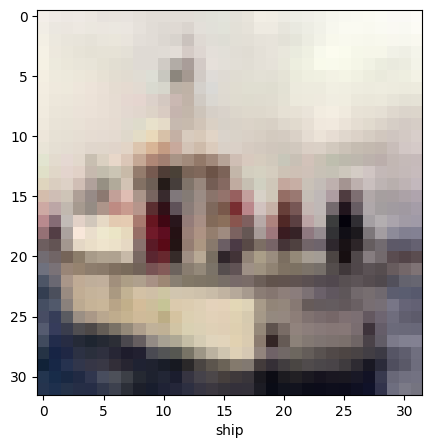

In [91]:
sample(X_test,y_test,88)

In [83]:
y_pred_classes[0]

3

In [88]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
ca=[]
for i,class_name in enumerate(classes):
  ca.append((i,class_name))

In [89]:
ca

[(0, 'airplane'),
 (1, 'automobile'),
 (2, 'bird'),
 (3, 'cat'),
 (4, 'deer'),
 (5, 'dog'),
 (6, 'frog'),
 (7, 'horse'),
 (8, 'ship'),
 (9, 'truck')]

In [92]:
CNN.save('CNN claasification')